In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely import wkt
from matplotlib import pyplot as plt
import descartes
import seaborn as sns
import datetime as dt
import geoplot as geoplot
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
airbnb = pd.read_csv('../data/cleaned_for_eda/airbnb.csv')

In [3]:
airbnb.shape

(3904, 182)

In [4]:
airbnb['price']

0       221.00
1       144.00
2        90.00
3        70.00
4        70.43
         ...  
3899    178.00
3900    139.00
3901     84.00
3902     93.00
3903     45.00
Name: price, Length: 3904, dtype: float64

<AxesSubplot:xlabel='room_type', ylabel='price'>

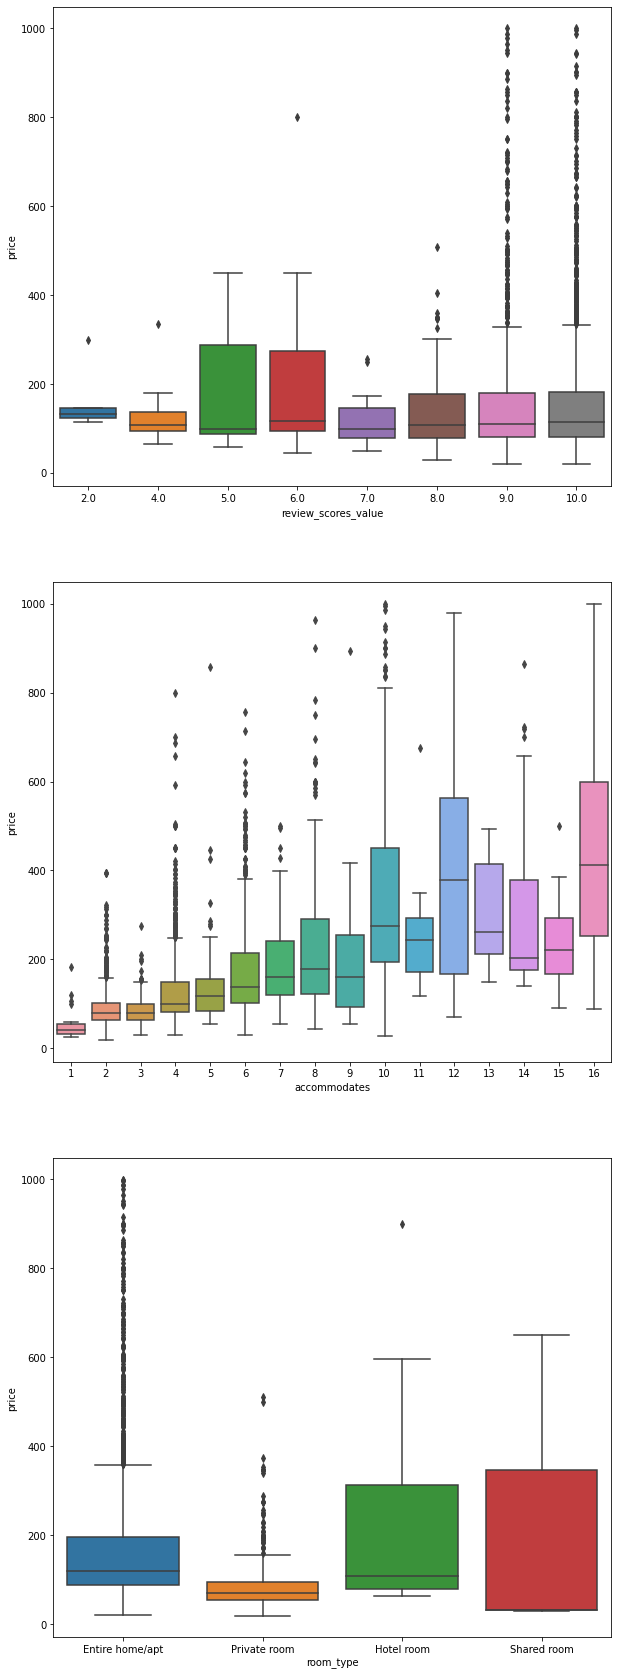

In [5]:
plt.figure(figsize = (10, 30))
#plt.subplots(2,1)
plt.subplot(3,1,1)
sns.boxplot(y='price', x = "review_scores_value", data = airbnb)
#axes[0].set_title('Review Score')
plt.subplot(3,1,2)
sns.boxplot(y='price', x = 'accommodates', data = airbnb)
#axes[1].set_title('Accomodates')
plt.subplot(3,1,3)
sns.boxplot(y='price', x = 'room_type', data = airbnb)

In [44]:
#It seems suspicious to me that a shared room could be so expensive
#This listing on airbnb seems to be a hotel room for multiple people
print(airbnb[['name','price','room_type','property_type']][(airbnb['room_type']=='Shared room') & (airbnb["price"]>400)])

                                                   name  price    room_type  \
1853  JAZZ QUARTERS-ARMSTRONG SUITE-3 BLOCKS TO BOURBON  450.0  Shared room   
1859  JAZZ QUARTERS-THE MARSALIS-3 BLOCKS TO BOURBON...  650.0  Shared room   

               property_type  
1853  Shared room in cottage  
1859  Shared room in cottage  


In [81]:
np.min(airbnb[['name','price']][airbnb['room_type']=='Shared room'])

name     JAZZ QUARTERS-ARMSTRONG SUITE-3 BLOCKS TO BOURBON
price                                                   29
dtype: object

In [6]:
#I'm not really sure what 'shared room' means and there are only six of them so I'm deleting them
print(len(airbnb[airbnb["room_type"]=='Shared room']))

6


In [8]:
#I might only analyze the entire home airbnbs. There are only 37 hotel rooms and I'm interested in how much
#a homeowner can make earn with an airbnb
print(len(airbnb[airbnb["room_type"]=='Entire home/apt']))
print(len(airbnb[airbnb['room_type']=='Hotel room']))

3426
37
435


In [9]:
#There are only 435 private rooms and the boxplots show a enough difference to analyze them differently
print(len(airbnb[airbnb['room_type']=='Private room']))


435
